## DECISION TREES

## Exercise 1

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Question 1 Load the wine data set and prepare it for a machine learning application using split sample evaluation (with the train_test_split function of Scikit-learn). Keep 30 % of the date set for the final evaluation.

In [58]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [59]:
#assigning values to the dataset

df2 = df.drop(labels='quality', axis=1, inplace=False)
x = df2
y = df.loc[:, 'quality']

In [60]:
#splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)

Question 2 Create a default DecisionTreeRegressor, fit it to the learning data and show the prediction performances obtained on the test set (using the mean squared error (MSE) as well as a graphical representation).

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [62]:
#creating the default regressor and fitting the training data to it

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
#making predictions on the testing data

y_pred = regressor.predict(x_test)
print(y_pred)

[5. 6. 5. 4. 5. 6. 5. 5. 6. 6. 4. 5. 6. 5. 5. 6. 5. 5. 5. 7. 5. 6. 5. 5.
 7. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 7. 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 7.
 5. 4. 5. 7. 5. 6. 5. 5. 6. 6. 6. 6. 6. 5. 5. 6. 7. 6. 7. 8. 6. 5. 5. 6.
 7. 6. 6. 6. 6. 5. 7. 6. 5. 4. 6. 5. 5. 6. 6. 7. 6. 6. 5. 7. 5. 5. 6. 6.
 5. 6. 6. 5. 6. 6. 6. 7. 5. 5. 7. 5. 5. 5. 6. 5. 5. 5. 6. 7. 6. 5. 6. 6.
 5. 5. 6. 5. 6. 3. 6. 6. 4. 5. 5. 6. 5. 5. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 5. 6. 6. 7. 6. 5. 6. 5. 5. 6. 5. 6. 5. 5. 5. 5. 7. 6. 5. 5. 5. 6.
 6. 6. 6. 5. 5. 7. 6. 6. 7. 5. 4. 8. 8. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5.
 5. 5. 6. 6. 5. 6. 5. 7. 6. 5. 5. 6. 6. 6. 5. 6. 5. 7. 7. 7. 6. 6. 6. 5.
 5. 6. 6. 4. 6. 5. 5. 7. 6. 5. 6. 7. 5. 6. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5.
 5. 5. 6. 6. 5. 6. 5. 5. 5. 7. 5. 5. 5. 6. 6. 5. 6. 6. 6. 6. 6. 7. 5. 5.
 7. 6. 6. 7. 5. 7. 5. 5. 7. 6. 5. 5. 7. 5. 3. 6. 6. 5. 6. 6. 6. 6. 5. 8.
 6. 6. 5. 5. 6. 5. 7. 6. 6. 5. 5. 5. 5. 5. 4. 6. 6. 6. 6. 6. 4. 5. 5. 5.
 4. 6. 6. 6. 6. 6. 4. 6. 6. 5. 7. 5. 6. 5. 6. 5. 5.

In [64]:
#prediction performances using mean squared error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.65625


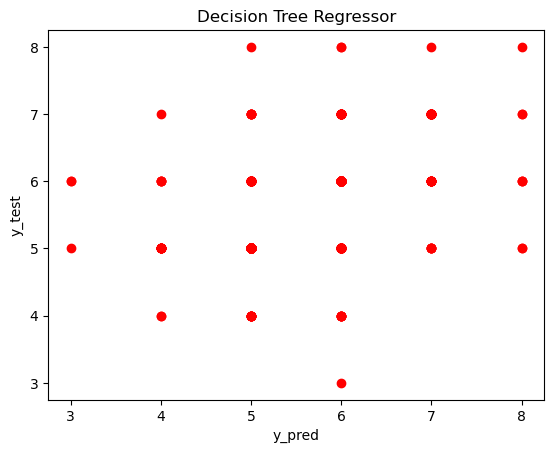

In [65]:
#graphical representation

plt.scatter(y_pred, y_test, color='r')
plt.title("Decision Tree Regressor")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

Question 3 Assess whether the decision tree has overfitted the data.

In [66]:
#comparing the mean squared errors

y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [67]:
mse_train_set = mean_squared_error(y_train, y_pred_train)
mse_test_set = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error on train set: {mse_train_set}")
print(f"Mean Squared Error on test set: {mse_test_set}")

Mean Squared Error on train set: 0.0
Mean Squared Error on test set: 0.65625


We can see that the value for the Mean Squared Error for the test set at 0.65625 is higher than the same on the train set at 0.0. Hence, we can conclude that indeed the model has overfitted the data.

Question 4 The default value for min_samples_split is 2, which enables the creation of enormous trees. Use a loop to learn a series of trees with larger values for min_samples_split and collect the MSE of trees on the learning set and on the test set. Draw the corresponding curves.

In [68]:
mse_train = []
mse_test = []

# Defining a range of min_samples_split values to test

min_samples_split_range = range(2, 23)

for min_samples_split in min_samples_split_range:
    regressor = DecisionTreeRegressor(min_samples_split = min_samples_split)
    regressor.fit(x_train, y_train)

    y_train_pred = regressor.predict(x_train)
    y_test_pred = regressor.predict(x_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

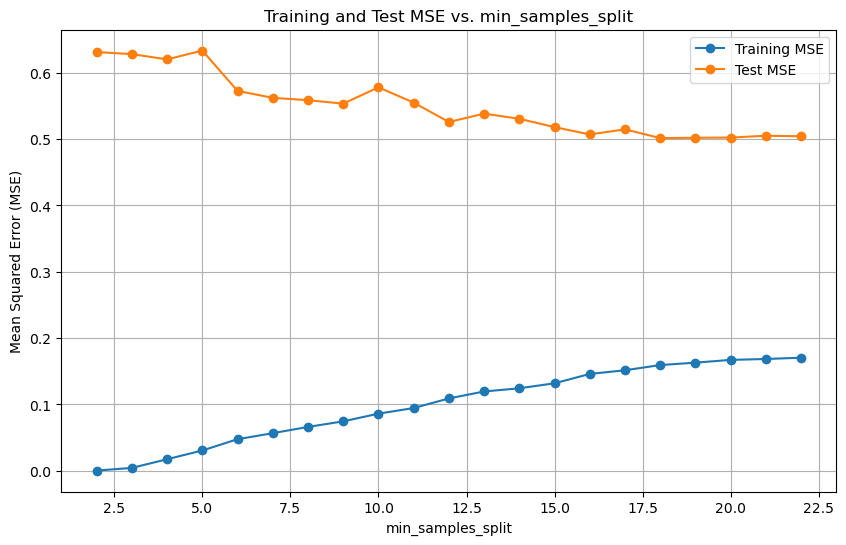

In [69]:
#Graphical representation of the corresponding curves

plt.figure(figsize =(10, 6))
plt.plot(min_samples_split_range, mse_train, label='Training MSE', marker='o')
plt.plot(min_samples_split_range, mse_test, label='Test MSE', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE vs. min_samples_split')
plt.legend()
plt.grid()
plt.show()

Question 4 The default value for min_samples_split is 2, which enables the creation of enormous trees. Use a loop to learn a series of trees with larger values for min_samples_split and collect the MSE of trees on the learning set and on the test set. Draw the corresponding curves.

In [70]:
mse_train = []
mse_test = []

# Defining a range of max_depth values to test
max_depth_range = range(1, 23)  

for max_depth in max_depth_range:
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(x_train, y_train)

    y_train_pred = regressor.predict(x_train)
    y_test_pred = regressor.predict(x_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

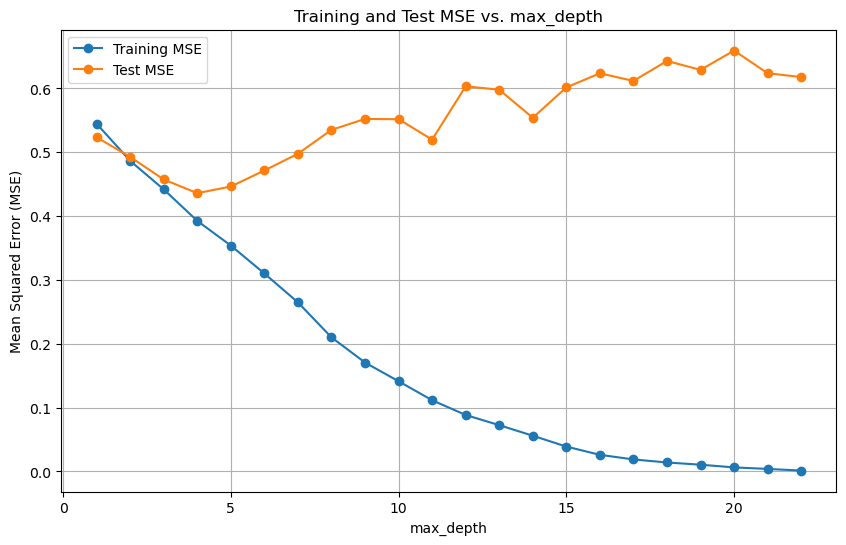

In [71]:
#Graphical representation of the corresponding curves

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, mse_train, label='Training MSE', marker='o')
plt.plot(max_depth_range, mse_test, label='Test MSE', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test MSE vs. max_depth')
plt.legend()
plt.grid()
plt.show()

## Exercise 2

Question 1 Load the rice data set and prepare it for a machine learning application using split sample evaluation (with the train_test_split function of Scikit-learn). Keep 30 % of the date set for the final evaluation.

In [101]:
df = pd.read_csv('rice.csv')
print(df)

       AREA   PERIMETER   MAJORAXIS  MINORAXIS  ECCENTRICITY  CONVEX_AREA  \
0     15231  525.578979  229.749878  85.093788      0.928882        15617   
1     14656  494.311005  206.020065  91.730972      0.895405        15072   
2     14634  501.122009  214.106781  87.768288      0.912118        14954   
3     13176  458.342987  193.337387  87.448395      0.891861        13368   
4     14688  507.166992  211.743378  89.312454      0.906691        15262   
...     ...         ...         ...        ...           ...          ...   
3805  11441  415.858002  170.486771  85.756592      0.864280        11628   
3806  11625  421.390015  167.714798  89.462570      0.845850        11904   
3807  12437  442.498993  183.572922  86.801979      0.881144        12645   
3808   9882  392.296997  161.193985  78.210480      0.874406        10097   
3809  11434  404.709991  161.079269  90.868195      0.825692        11591   

        EXTENT     CLASS  
0     0.572896    Cammeo  
1     0.615436    Cam

In [102]:
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [103]:
df.CLASS.unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [104]:
class_map = {"Cammeo":0, "Osmancik":1}

In [105]:
df['CLASS'] = df['CLASS'].replace(class_map)
print(df)

       AREA   PERIMETER   MAJORAXIS  MINORAXIS  ECCENTRICITY  CONVEX_AREA  \
0     15231  525.578979  229.749878  85.093788      0.928882        15617   
1     14656  494.311005  206.020065  91.730972      0.895405        15072   
2     14634  501.122009  214.106781  87.768288      0.912118        14954   
3     13176  458.342987  193.337387  87.448395      0.891861        13368   
4     14688  507.166992  211.743378  89.312454      0.906691        15262   
...     ...         ...         ...        ...           ...          ...   
3805  11441  415.858002  170.486771  85.756592      0.864280        11628   
3806  11625  421.390015  167.714798  89.462570      0.845850        11904   
3807  12437  442.498993  183.572922  86.801979      0.881144        12645   
3808   9882  392.296997  161.193985  78.210480      0.874406        10097   
3809  11434  404.709991  161.079269  90.868195      0.825692        11591   

        EXTENT  CLASS  
0     0.572896      0  
1     0.615436      0  
2  

In [106]:
x = df.drop(["CLASS"], axis = 1)
y = df.CLASS

In [107]:
#splitting the data set

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)

Question 2 Compute the pruning summary on the training set for the rice data set and plot the evolution of the impurity on the training as a function of the alpha parameter.

In [109]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 7)
dt_pruning = dt.cost_complexity_pruning_path(x_train, y_train)
print(dt_pruning)

{'ccp_alphas': array([0.00000000e+00, 3.12460942e-04, 3.12460942e-04, 3.21388398e-04,
       3.21388398e-04, 3.37457818e-04, 3.38667344e-04, 3.40866483e-04,
       3.40866483e-04, 3.43707037e-04, 3.43707037e-04, 3.50917674e-04,
       3.52897064e-04, 3.53491167e-04, 3.55218756e-04, 3.56205474e-04,
       3.57098220e-04, 3.58997678e-04, 3.61561948e-04, 3.62857869e-04,
       3.64240184e-04, 3.69439114e-04, 3.69953756e-04, 3.72785772e-04,
       3.73538213e-04, 3.74254894e-04, 3.74953131e-04, 3.75157385e-04,
       3.77101095e-04, 4.06796170e-04, 4.28517864e-04, 4.49943757e-04,
       4.74468002e-04, 4.99937508e-04, 4.99937508e-04, 4.99937508e-04,
       4.99937508e-04, 4.99937508e-04, 4.99937508e-04, 4.99937508e-04,
       5.33405772e-04, 5.35647330e-04, 5.39932508e-04, 5.52203702e-04,
       5.62429696e-04, 5.62429696e-04, 5.62429696e-04, 5.71357152e-04,
       5.71357152e-04, 5.81658062e-04, 5.85965715e-04, 5.99925009e-04,
       6.21206763e-04, 6.42776796e-04, 6.44476893e-04, 6.44682

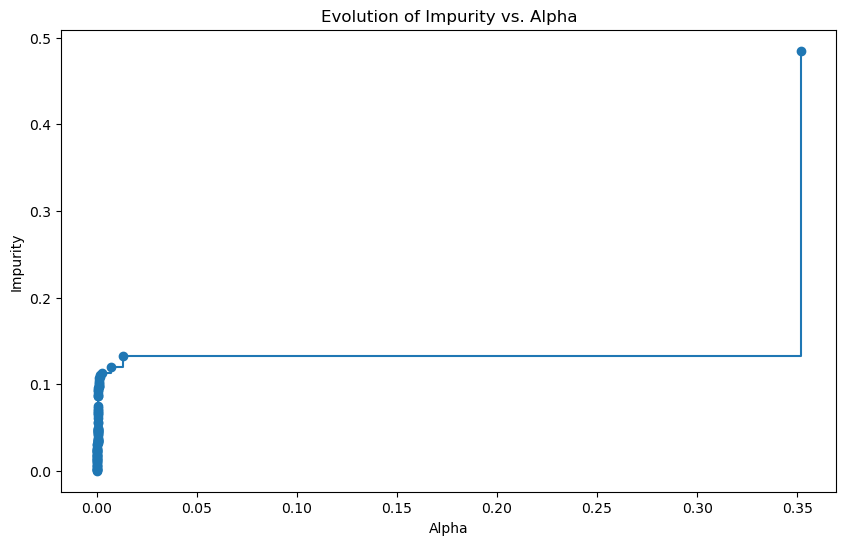

In [110]:
#Extracting ccp_alphas and impurities from the pruning summary
ccp_alphas, impurities = dt_pruning.ccp_alphas, dt_pruning.impurities

# Ploting the evolution of impurity as a function of the alpha parameter
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Impurity")
plt.title("Evolution of Impurity vs. Alpha")
plt.show()

Question 3 Using a loop, compute all the pruned trees as well as their accuracy (i.e. one minus their empirical risk for the binary loss function) on both the training set and the test set.

In [112]:
from sklearn.metrics import accuracy_score

# Initialize lists to store the pruned trees and their corresponding accuracies
pruned_trees = []
train_accuracies = []
test_accuracies = []

#Iterating over different alpha values
for alpha in ccp_alphas:
    #Pruning the decision tree with the current alpha
    pruned_tree = DecisionTreeClassifier(random_state=7, ccp_alpha=alpha)
    pruned_tree.fit(x_train, y_train)

    #Predicting on the training and test sets
    y_train_pred = pruned_tree.predict(x_train)
    y_test_pred = pruned_tree.predict(x_test)

    #Calculating the accuracy for the training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #Appending the pruned tree and its accuracies to the respective lists
    pruned_trees.append(pruned_tree)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


for i, alpha in enumerate(ccp_alphas):
    print(f"Alpha = {alpha:.4f}, Train Accuracy = {train_accuracies[i]:.4f}, Test Accuracy = {test_accuracies[i]:.4f}")

Alpha = 0.0000, Train Accuracy = 1.0000, Test Accuracy = 0.8924
Alpha = 0.0003, Train Accuracy = 0.9993, Test Accuracy = 0.8924
Alpha = 0.0003, Train Accuracy = 0.9993, Test Accuracy = 0.8924
Alpha = 0.0003, Train Accuracy = 0.9985, Test Accuracy = 0.8933
Alpha = 0.0003, Train Accuracy = 0.9985, Test Accuracy = 0.8933
Alpha = 0.0003, Train Accuracy = 0.9981, Test Accuracy = 0.8933
Alpha = 0.0003, Train Accuracy = 0.9970, Test Accuracy = 0.8941
Alpha = 0.0003, Train Accuracy = 0.9963, Test Accuracy = 0.8933
Alpha = 0.0003, Train Accuracy = 0.9963, Test Accuracy = 0.8933
Alpha = 0.0003, Train Accuracy = 0.9944, Test Accuracy = 0.8950
Alpha = 0.0003, Train Accuracy = 0.9944, Test Accuracy = 0.8950
Alpha = 0.0004, Train Accuracy = 0.9936, Test Accuracy = 0.8950
Alpha = 0.0004, Train Accuracy = 0.9933, Test Accuracy = 0.8950
Alpha = 0.0004, Train Accuracy = 0.9929, Test Accuracy = 0.8950
Alpha = 0.0004, Train Accuracy = 0.9925, Test Accuracy = 0.8950
Alpha = 0.0004, Train Accuracy = 0.9921,

Question 4 Plot the results and comment them.

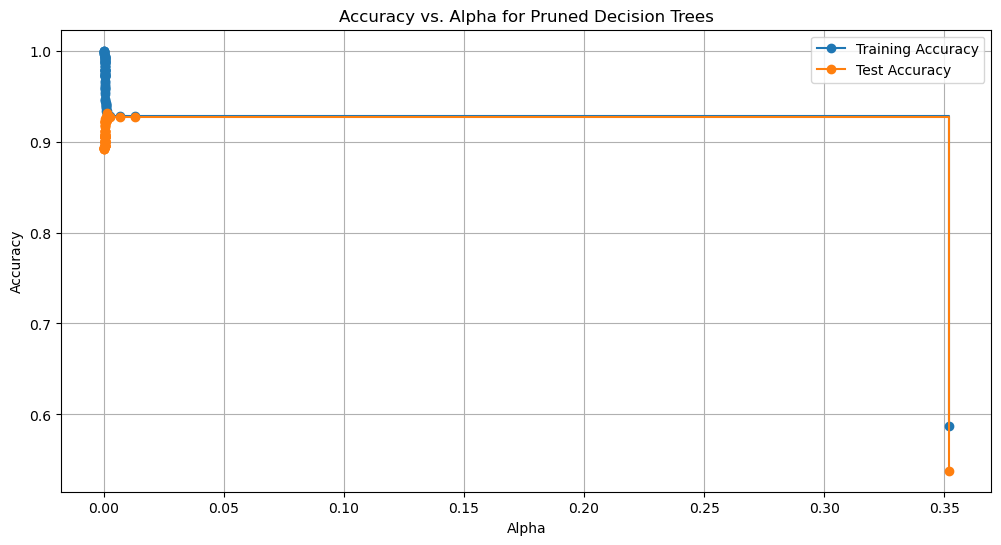

In [113]:
#Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha for Pruned Decision Trees")
plt.legend()
plt.grid(True)
plt.show()

Comments on the results obtained: Both the traning and testing accuracies seem to be perfect for the pruned decision trees as the curves for both overlap completely.

Question 5 Apply the same strategy to the wine data set from exercise 1 and compare the effects of pruning with those of controlling directly the stopping criteria.

In [114]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [115]:
#assigning values to the dataset

df2 = df.drop(labels='quality', axis=1, inplace=False)
x = df2
y = df.loc[:, 'quality']

#splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3)

In [116]:
#Computing all the pruned trees as well as their accuracy on both the training set and the test set for the red wine quality data set

pruned_trees = []
train_accuracies = []
test_accuracies = []

#Iterating over different alpha values
for alpha in ccp_alphas:
    #Pruning the decision tree with the current alpha
    pruned_tree = DecisionTreeClassifier(random_state=7, ccp_alpha=alpha)
    pruned_tree.fit(x_train, y_train)

    #Predicting on the training and test sets
    y_train_pred = pruned_tree.predict(x_train)
    y_test_pred = pruned_tree.predict(x_test)

    #Calculating the accuracy for the training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #Appending the pruned tree and its accuracies to the respective lists
    pruned_trees.append(pruned_tree)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


for i, alpha in enumerate(ccp_alphas):
    print(f"Alpha = {alpha:.4f}, Train Accuracy = {train_accuracies[i]:.4f}, Test Accuracy = {test_accuracies[i]:.4f}")

Alpha = 0.0000, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0003, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0004, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0004, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0004, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0004, Train Accuracy = 1.0000, Test Accuracy = 0.5667
Alpha = 0.0004, Train Accuracy = 1.0000,

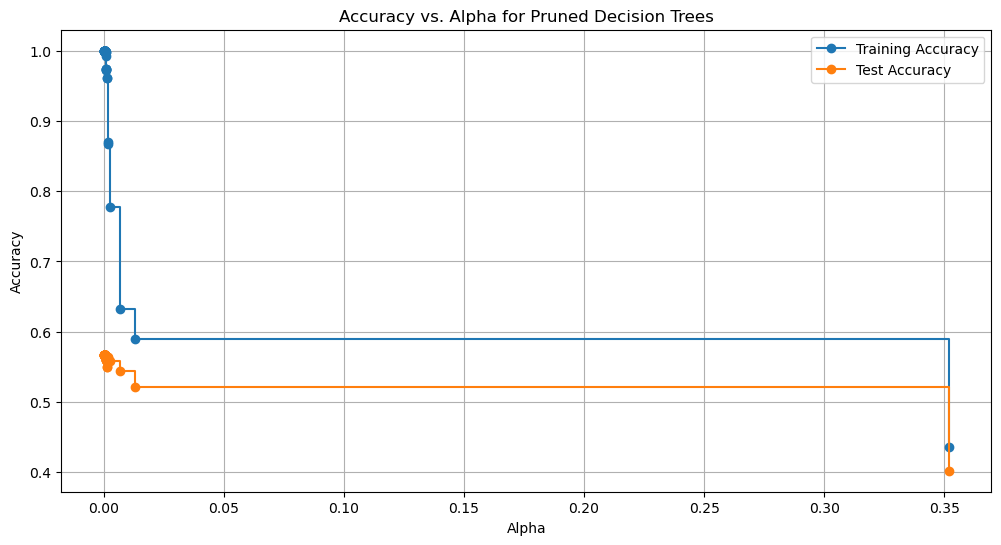

In [117]:
#Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Training Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha for Pruned Decision Trees")
plt.legend()
plt.grid(True)
plt.show()

In the previous exercise, we controlled the stopping criteria directly by using the maximum depth parameter of the tree. However, we see that pruning gives us better results, as expected. The test accuracy is slightly lower than the training one, however, the trends followed by both are more or less the same for all values of alpha. Whereas, using the maximum depth parameter, we saw that the Training Mean Squared Error fell significantly with increasing depth, while we observe a positive relationship between the Test Mean Squared Error and Maximum depth. Thereby, pruning has improved the prediction power of the model on the testing data with an accuracy score between 50% and 60% - lower than the training data but constant accross the different values of alpha.